**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/content/salary - salary.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,NaN
2,1.5,NaN
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.isna().sum()

YearsExperience    0
Salary             2
dtype: int64

In [5]:
x=data.iloc[:,0:1].values
y=data.iloc[:,1:2].values

**IMPUTING**

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
y[:,:]=imputer.fit_transform(y[:,:])

In [7]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

**FEATURE SCALING**

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
y=sc.fit_transform(y)

**MODEL** **SELECTION**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['YearsExperience']],data[['Salary']],test_size=0.25,random_state=1)

In [18]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.906065
Salary,0.906065,1.000000


**LINEAR REGRESSION**

In [19]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

**SLOPE AND INTERCEPT**

In [20]:
rg.coef_,rg.intercept_

(array([[7855.09644638]]), array([36514.66450161]))

In [25]:
ypred_train=rg.predict(x_train)

In [24]:
ypred_test=rg.predict(x_test)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error as mse
print("R2 SCORE (TEST)",r2_score(y_test,ypred_test))
print("R2 SCORE (TRAIN)",r2_score(y_train,ypred_train))

R2 SCORE (TEST) 0.8972692328654323
R2 SCORE (TRAIN) 0.7974373008487611


**PLOTTING**

Text(0, 0.5, 'SALARY')

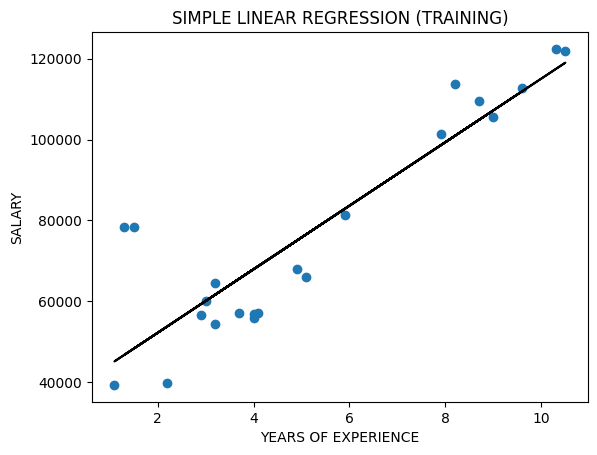

In [38]:
#Training Plot
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_train,ypred_train,color="black")
plt.title("SIMPLE LINEAR REGRESSION (TRAINING)")
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")


Text(0, 0.5, 'SALARY')

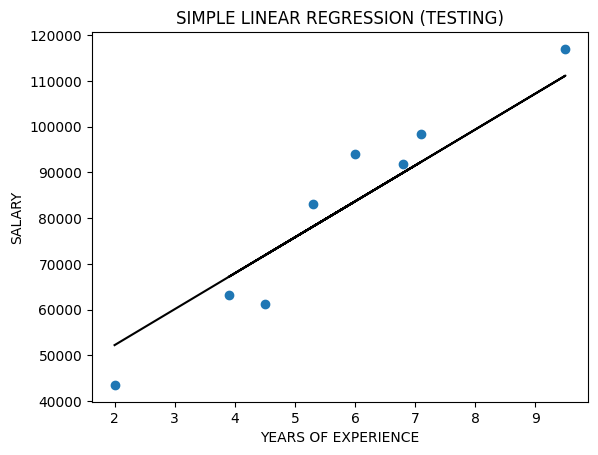

In [37]:
#Testing plot
plt.scatter(x_test,y_test)
plt.plot(x_test,ypred_test,color="black")
plt.title("SIMPLE LINEAR REGRESSION (TESTING)")
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")
